**notatki do machine learningu**

**Data preprocessing**

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('datasets/employee_data.csv')
print("Column names in the dataset:\n", dataset.columns)
#print("Dataset before encoding:\n", dataset)

Column names in the dataset:
 Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')


Te ktore nie sa cyfrowe trzeba przemianowac, do tego sluzy metoda get_dummies z pandas

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Gender', 'Position'], drop_first=True)

# Printing the dataset after encoding
print("Column names in the dataset:\n", dataset.columns)
print("Dataset after encoding:\n", dataset.head(3))

Column names in the dataset:
 Index(['ID', 'Experience (Years)', 'Salary', 'Gender_M',
       'Position_Database Administrator (DBA)', 'Position_DevOps Engineer',
       'Position_IT Manager', 'Position_IT Security Analyst',
       'Position_IT Support Specialist', 'Position_Network Administrator',
       'Position_Software Engineer', 'Position_Systems Administrator',
       'Position_Systems Analyst', 'Position_Web Developer'],
      dtype='object')
Dataset after encoding:
    ID  Experience (Years)  Salary  Gender_M  \
0   1                   4  109976     False   
1   2                   6  120088      True   
2   3                  17  181301      True   

   Position_Database Administrator (DBA)  Position_DevOps Engineer  \
0                                  False                      True   
1                                  False                      True   
2                                  False                     False   

   Position_IT Manager  Position_IT Security Analy

Troche nieszczesliwie sie to rysuje wyzej bo szerokie nazwy tych kolumn ale finalnie mamy duzo wiecej kolumn. Aczkolwiek do regresji liniowej bierzemy tylko jeden feature wiec:

Feature: ID
[[1]
 [2]
 [3]
 [4]
 [5]]
Training set shape for ID: (266, 1)
Test set shape for ID: (134, 1)
Predictions for ID: [130697.47306417 130575.0034962  130552.86210538 130653.19028253
 130618.59435938]


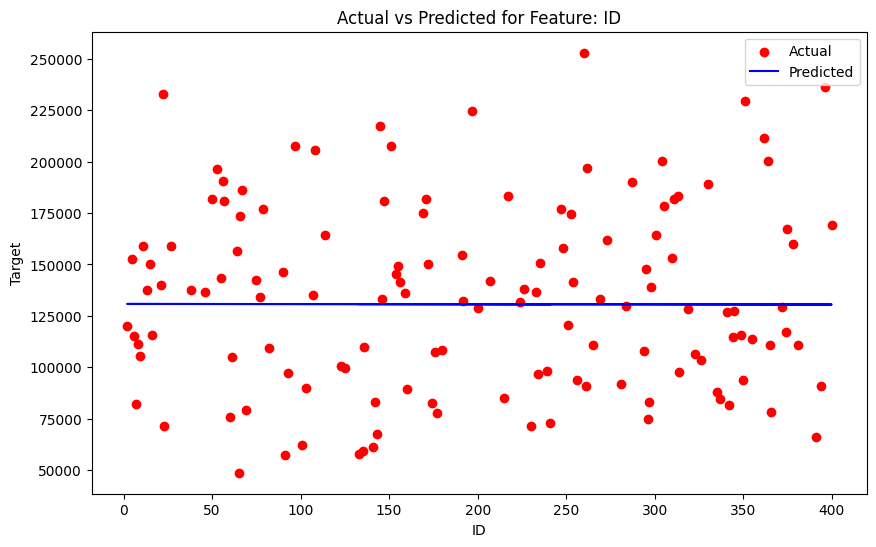

Feature: Experience (Years)
[[ 4]
 [ 6]
 [17]
 [ 7]
 [13]]
Training set shape for Experience (Years): (266, 1)
Test set shape for Experience (Years): (134, 1)
Predictions for Experience (Years): [103400.97991582 140214.28300923 140214.28300923 164756.4850715
 160666.11806112]


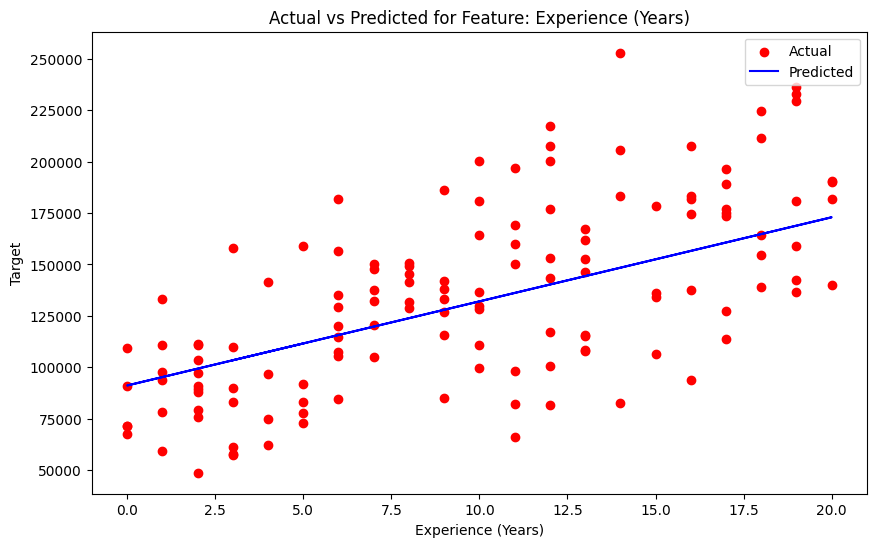

Feature: Gender_M
[[False]
 [ True]
 [ True]
 [ True]
 [False]]
Training set shape for Gender_M: (266, 1)
Test set shape for Gender_M: (134, 1)
Predictions for Gender_M: [130114.31818182 130114.31818182 130114.31818182 131176.87313433
 130114.31818182]


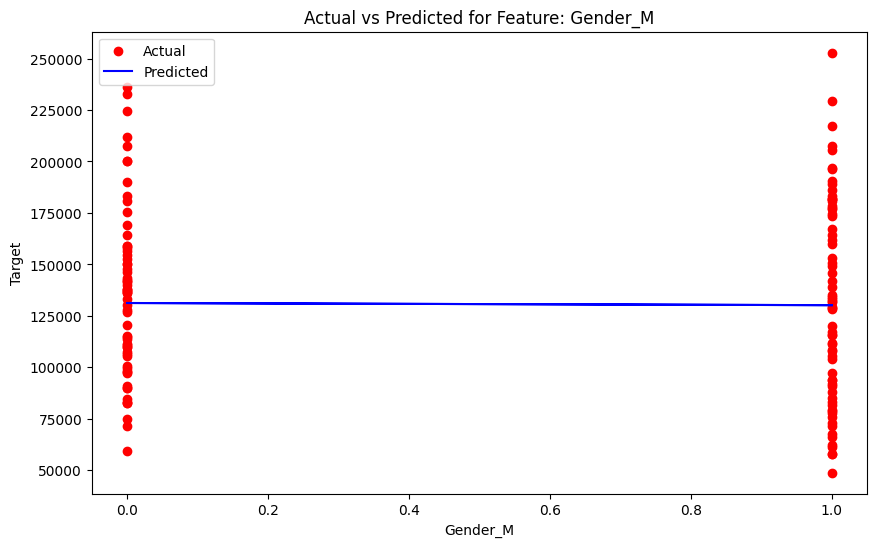

In [ ]:
#y = dataset.iloc[:, 2].values          # dataset.iloc[:, 2] selects the third column (index 2) of the dataset, .values converts this column into a NumPy array, y now contains all the values from the third column of the dataset.
#X = dataset.drop(columns=dataset.columns[2]).values # dataset.columns[2] gets the name of the third column, dataset.drop(columns=dataset.columns[2]) removes the third column from the dataset, .values converts the remaining columns into a NumPy array.
                                                    # X now contains all the values from the dataset except for the third column

# Selecting the specific column as the feature
#feature_column_index = 2  # Change this to the index of the column you want to use as the feature
#y = dataset.iloc[:, 2].values          # to jest nasz wzor jako target do predykcji
#X = dataset.iloc[:, feature_column_index].values.reshape(-1, 1)  # to są nasze features

for feature_column_index in range(4):
    if feature_column_index == 2:  # Skip the target column
        continue

    # Extract the feature column
    X = dataset.iloc[:, feature_column_index].values.reshape(-1, 1)  # to są nasze features

    # Save the feature column to a separate variable
    feature_name = dataset.columns[feature_column_index]
    globals()[f'X_{feature_name}'] = X

    # Print the feature name and the first few values for verification
    print(f'Feature: {feature_name}')
    print(X[:5])

    # Split the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

    # Save the split datasets to separate variables
    globals()[f'X_train_{feature_name}'] = X_train
    globals()[f'X_test_{feature_name}'] = X_test
    globals()[f'y_train_{feature_name}'] = y_train
    globals()[f'y_test_{feature_name}'] = y_test

    # Print the shapes of the split datasets for verification
    print(f'Training set shape for {feature_name}: {X_train.shape}')
    print(f'Test set shape for {feature_name}: {X_test.shape}')

    # Training the Simple Linear Regression model on the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Save the predictions to a separate variable
    globals()[f'y_pred_{feature_name}'] = y_pred

    # Print the first few predictions for verification
    print(f'Predictions for {feature_name}: {y_pred[:5]}')

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='red', label='Actual')
    plt.plot(X_test, y_pred, color='blue', label='Predicted')
    plt.title(f'Actual vs Predicted for Feature: {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.legend()
    plt.show()

Teraz podzielimy sobie nasz dataset na czesc do trenowania oraz czesc testowa zeby zobaczyc jak nasz wytrenowany na testowej czesci model radzi sobie z nowymi danymi

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
 [[149970]
 [123049]
 [148410]
 [134871]
 [211620]
 [188681]
 [140241]
 [114996]
 [146153]
 [116668]
 [ 92927]
 [161408]
 [ 76006]
 [ 72006]
 [ 70195]
 [214282]
 [111362]
 [268774]
 [ 97317]
 [162398]
 [114608]
 [ 85246]
 [134437]
 [ 88697]
 [136537]
 [125282]
 [ 79431]
 [149569]
 [ 97240]
 [190956]
 [ 67910]
 [101107]
 [204549]
 [101278]
 [110084]
 [260594]
 [109601]
 [112825]
 [157825]
 [159870]
 [ 94989]
 [128220]
 [108575]
 [114166]
 [ 92288]
 [182770]
 [152404]
 [ 66956]
 [ 90576]
 [105758]
 [100026]
 [ 68000]
 [168554]
 [122736]
 [174498]
 [ 79944]
 [150854]
 [159630]
 [156865]
 [158415]
 [181301]
 [162487]
 [108050]
 [127764]
 [104113]
 [103124]
 [127148]
 [ 93860]
 [ 94797]
 [116574]
 [102541]
 [124153]
 [ 91480]
 [ 87871]
 [154443]
 [ 79333]
 [126171]
 [ 71211]
 [205418]
 [112471]
 [178265]
 [ 95631]
 [128620]
 [ 43643]
 [126492]
 [107445]
 [121650]
 [112487]
 [149040]
 [129205]
 [133508]
 [ 77058]
 [130445]
 [ 54938]
 [110321]
 [139069]
 [118781]
 [110734]
 [ 98196]


Uczymy nasz model na tym co wiemy czyli na czesci datasetu jaka wyznaczylismy do trenowania

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

A teraz liczymy na wytrenowanym modelu to co zostawilismy w test czesci dataset

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

Porownajmy

In [ ]:
print("Real vs Predicted values:")
for real, predicted in zip(y_test, y_pred):
    print(f"Real: {real:.2f}, Predicted: {predicted:.2f}")

Real vs Predicted values:
Real: 57838.00, Predicted: 57838.00
Real: 152934.00, Predicted: 152934.00
Real: 81593.00, Predicted: 81593.00
Real: 224671.00, Predicted: 224671.00
Real: 177180.00, Predicted: 177180.00
Real: 105182.00, Predicted: 105182.00
Real: 141631.00, Predicted: 141631.00
Real: 196839.00, Predicted: 196839.00
Real: 82987.00, Predicted: 82987.00
Real: 85199.00, Predicted: 85199.00
Real: 137535.00, Predicted: 137535.00
Real: 59145.00, Predicted: 59145.00
Real: 164112.00, Predicted: 164112.00
Real: 115769.00, Predicted: 115769.00
Real: 137662.00, Predicted: 137662.00
Real: 75749.00, Predicted: 75749.00
Real: 108040.00, Predicted: 108040.00
Real: 61236.00, Predicted: 61236.00
Real: 142031.00, Predicted: 142031.00
Real: 128641.00, Predicted: 128641.00
Real: 77683.00, Predicted: 77683.00
Real: 132950.00, Predicted: 132950.00
Real: 99469.00, Predicted: 99469.00
Real: 127533.00, Predicted: 127533.00
Real: 107263.00, Predicted: 107263.00
Real: 97706.00, Predicted: 97706.00
Real: 

Teraz wezmy ten sam dataset do multiple lienar regression czyli poszukajmy na kilku featuresach

In [ ]:
y = dataset.iloc[:, 2].values          # wskazujemy na trzecia kolumne (Salary) jako to co chcemy przewidywac naszym modelem
X = dataset.drop(columns=dataset.columns[2]).values # dropujemy trzecia kolumne aby X zawieral tylko features

print("X:\n", X)
print("y:\n", y)

X:
 [[1 4 False ... False False False]
 [2 6 True ... False False False]
 [3 17 True ... False False True]
 ...
 [398 9 False ... False False False]
 [399 18 True ... False False False]
 [400 11 False ... False False False]]
y:
 [109976 120088 181301  77530 152397 114998  82328 111494 105563 162706
 158856 103940 137662 139069 150286 115698 111156 188681 129205  84342
 139766 232972  71220 235235  71211 146668 158855 158415 116964 168554
 146153 135205 120102  97240 101107  87871 171297 137535  87698 138718
 149040 122207 149342  65646 112471 136474 114166  86362 130119 181711
 115201 150854 196175 137302 143412 190672 180757 152107 111250  75749
 105182 260594  73364 156504  48710 173720 186239 126171  79108  86110
 226461 110321 172582  66956 142525 141623 134111 132249 176976  77058
 117934 109573 197617 132670  64220 110084  54739  70941 156027 146249
  57567 140147  97051 128620 150869 102783 207518 101278 157705 131176
  62204 123049  90049 161408 153779  86225 135066 205579 1085